<a href="https://colab.research.google.com/github/FuturisticLover123/InnowiseInternship/blob/main/task1/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
kaggle_token = {"username":"arseniyatrushkevich",
 "key":"546c397b87b27d9af5160bae671e5259"}

json.dump(kaggle_token, open('kaggle.json', 'w'))

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
%pip install kaggle

!mkdir -p data_storage
!kaggle competitions download -c competitive-data-science-predict-future-sales -p data_storage
!unzip -q data_storage/competitive-data-science-predict-future-sales.zip -d data_storage


Note: you may need to restart the kernel to use updated packages.
competitive-data-science-predict-future-sales.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data_storage/item_categories.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
%pip install pandas seaborn matplotlib numpy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [4]:
path = 'data_storage/'

train = pd.read_csv(f'{path}sales_train.csv')
shops = pd.read_csv(f'{path}shops.csv')
items = pd.read_csv(f'{path}items.csv')
item_categories = pd.read_csv(f'{path}item_categories.csv')
test = pd.read_csv(f'{path}test.csv')

In [5]:
display(train.head())
display(test.head())
display(items.head())
display(item_categories.head())
display(shops.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
display(train.info())
display(test.info())
display(items.info())
display(item_categories.info())
display(shops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

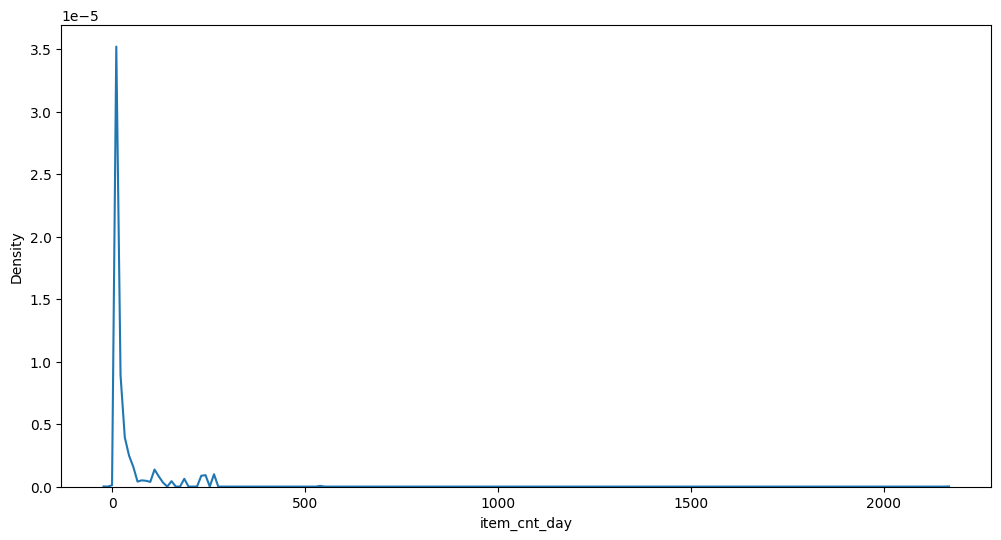

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train['item_cnt_day'])
plt.show()
# сомнительно 

In [30]:
negative_sales = train[train['item_cnt_day'] < 0]
display(negative_sales.head())
# отрицательные продажи это сомнительно

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0


In [ ]:
high_prices = train[train['item_price'] > 100000]
print(f"Товары с ценой > 100,000: {len(high_prices)}")
display(high_prices.head())
# очень дорого вероятно выбросы 

Товары с ценой > 100,000: 1


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


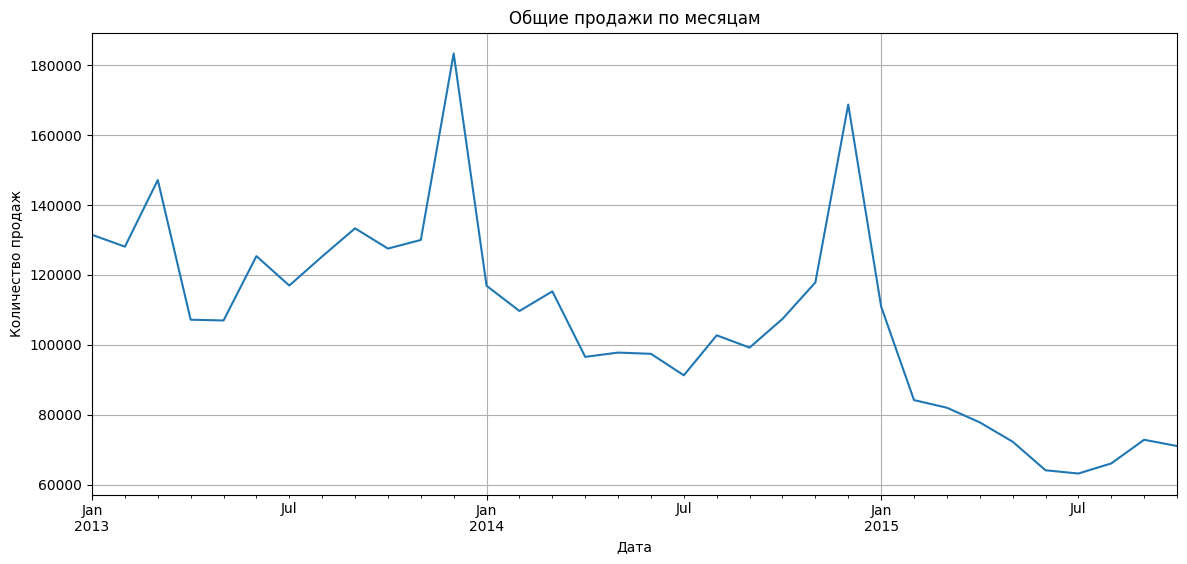

In [38]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
monthly_sales = train.groupby(pd.to_datetime(train['date']).dt.to_period('M'))['item_cnt_day'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(title='Общие продажи по месяцам', grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

# 2 явных пика перед новым годом